In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get data from kagle dircetly into google cloab

In [2]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=54eba69470cf4a38874ad4f42b1a5e8adec0e12b3c6412b0281a68035665f561
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [6]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 97% 281M/290M [00:09<00:00, 19.6MB/s]
100% 290M/290M [00:09<00:00, 32.0MB/s]


In [7]:
!ls

drive  kaggle.json  sample_data  us-accidents.zip


In [8]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 77 kB 2.8 MB/s 


In [10]:
from pyunpack import Archive
Archive('us-accidents.zip').extractall('/content/drive/MyDrive/EDA')

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import numpy as np

In [3]:
df_data = pd.read_csv("/content/drive/MyDrive/EDA/US_Accidents_Dec20_Updated.csv")

In [4]:
df_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [202]:
df_data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Wind_Direction', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Duration', 'Year', 'Month', 'Weekday', 'Day',
       'Hour', 'Minute', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc',
       'Severity4'],
      dtype='object')

Lets check each column name and its data type 

In [120]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Find the min, max and mean values of all numeric data, can find out what was the max, min and mean of temperature, humidity, pressure, wind chiill and severity values

In [17]:
df_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


### Distribution of Severity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


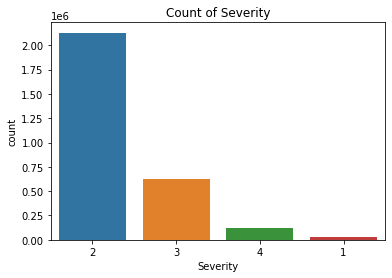

In [27]:
sns.countplot('Severity',data=df_data,order=df_data['Severity'].value_counts().index)
plt.title('Count of Severity')
plt.show()

### States and city have highest number of accident 

In [55]:
states = df_data.State.unique() 
states

array(['SC', 'NC', 'CA', 'NV', 'FL', 'CO', 'TN', 'NY', 'TX', 'AZ', 'NJ',
       'MI', 'GA', 'VA', 'IN', 'LA', 'PA', 'MN', 'OH', 'MD', 'CT', 'IL',
       'MO', 'OR', 'NE', 'OK', 'UT', 'WA', 'AL', 'WI', 'MA', 'DC', 'MS',
       'KS', 'KY', 'ME', 'IA', 'WV', 'AR', 'ID', 'RI', 'WY', 'NM', 'MT',
       'NH', 'DE', 'ND', 'SD', 'VT'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


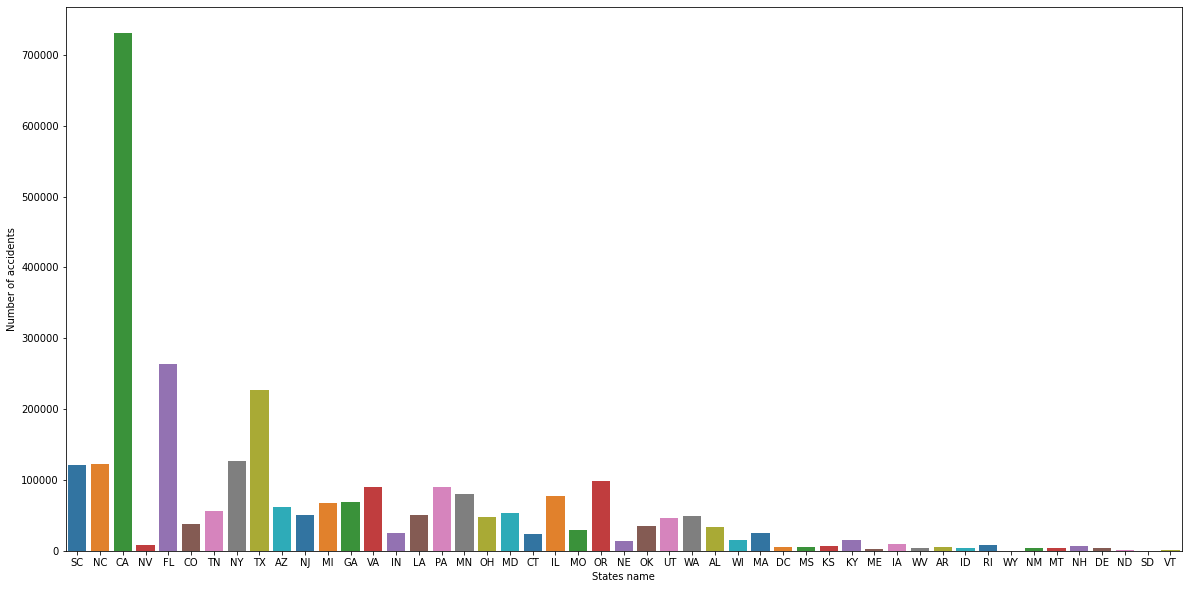

In [45]:
count_by_state=[]
for i in states:
    count_by_state.append(df_data[df_data['State']==i].count()['ID'])

fig,ax = plt.subplots(figsize=(20,10))
ax.set(xlabel='States name', ylabel='Number of accidents')
sns.barplot(states,count_by_state, palette=sns.color_palette())

In [7]:
city = df_data['City'].unique() 
count_by_city=[]
for i in city:
    count_by_city.append(df_data[df_data['City']==i].count()['ID'])

list1, list2 = zip(*sorted(zip(count_by_city, city)))
list_accident=list1[::-1]
list_city=list2[::-1]

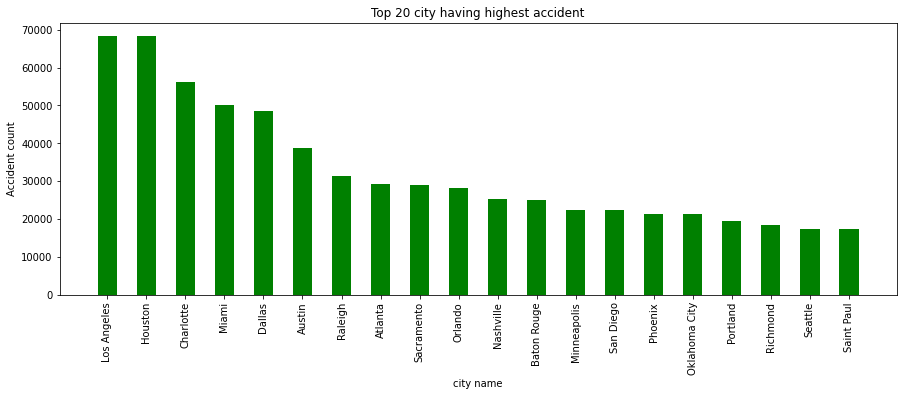

In [40]:
plt.figure(figsize=(15,5))
plt.bar(list_city[0:20],list_accident[0:20],width = 0.5,color='green')
plt.xticks(rotation='vertical')
plt.title('Top 20 city having highest accident')
plt.xlabel('city name')
plt.ylabel('Accident count')
plt.show()


## TimeZone Feature

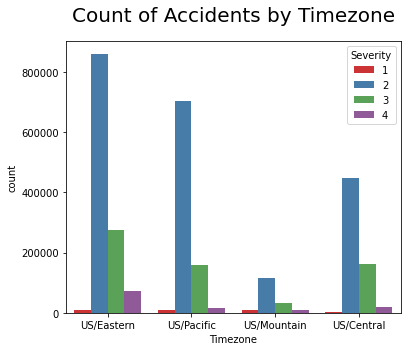

In [74]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity', data=df_data ,palette="Set1")
plt.title("Count of Accidents by Timezone", size=20, y=1.05)
plt.show()

# Weather Features

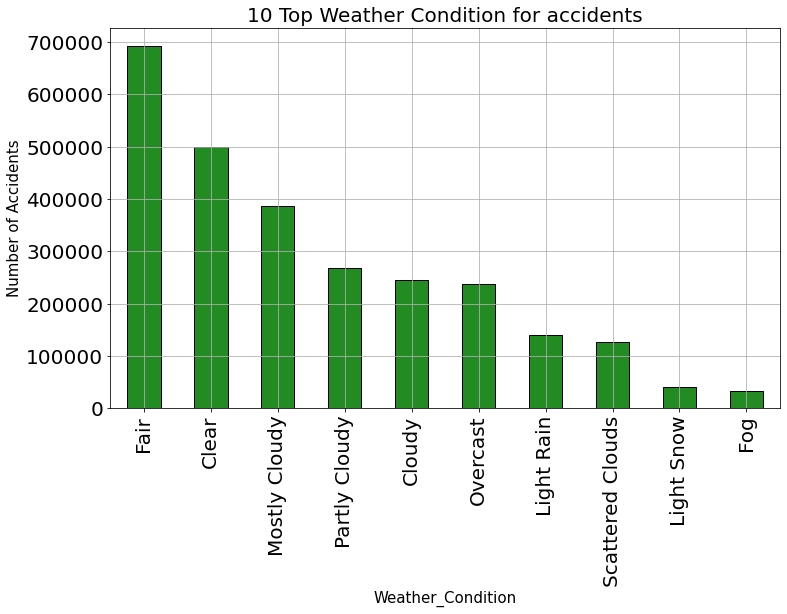

In [69]:
fig, ax=plt.subplots(figsize=(12,7))
df_data['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1,color='forestgreen')
plt.xlabel('Weather_Condition',fontsize=15)
plt.ylabel('Number of Accidents',fontsize=15)
ax.tick_params(labelsize=20)
plt.title('10 Top Weather Condition for accidents',fontsize=20)
plt.grid()
plt.ioff()

In [32]:
df_data['Pressure_bc']= boxcox(df_data['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
df_data['Visibility_bc']= boxcox(df_data['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df_data['Wind_Speed_bc']= boxcox(df_data['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df_data = df_data.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

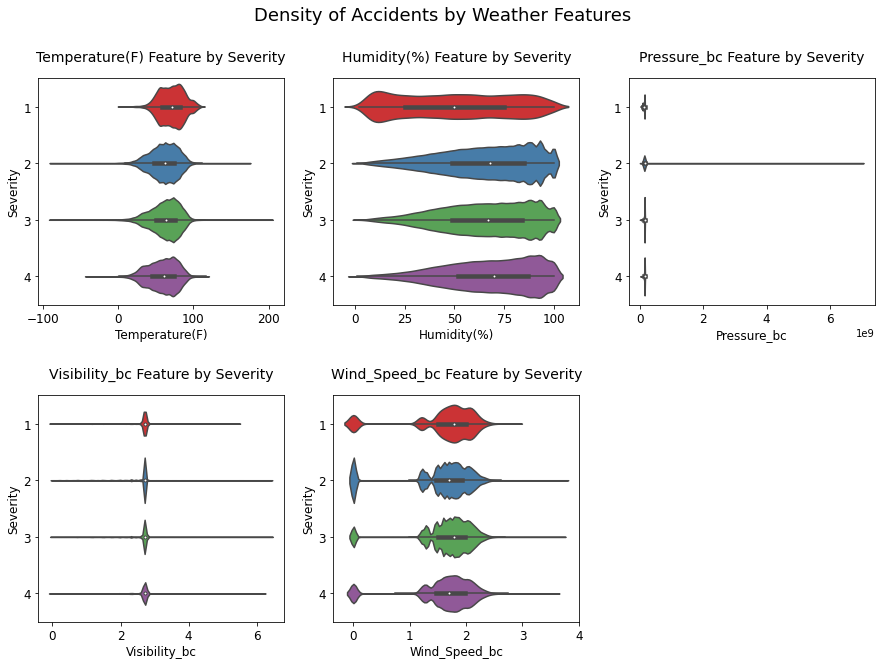

In [33]:
df_data['Severity4'] = df_data['Severity'].astype('category')
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_data, palette="Set1")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by Weather Features', fontsize=18)
plt.show()

## Total number of accident based on temperature less than 50F and greater than temperature greater than 85F

In [42]:
cold_temp=df_data[df_data['Temperature(F)']<50]
hot_temp=df_data[df_data['Temperature(F)']>85]

cold_temp_unique= cold_temp['Temperature(F)'].unique() 
count_by_cold_temp=[]
for i in cold_temp_unique:
    count_by_cold_temp.append(df_data[df_data['Temperature(F)']==i].count()['ID'])
accident_cold_temp=sum(count_by_cold_temp)

hot_temp_unique= hot_temp['Temperature(F)'].unique() 
count_by_hot_temp=[]
for i in hot_temp_unique:
    count_by_hot_temp.append(df_data[df_data['Temperature(F)']==i].count()['ID'])
accident_hot_temp=sum(count_by_hot_temp)

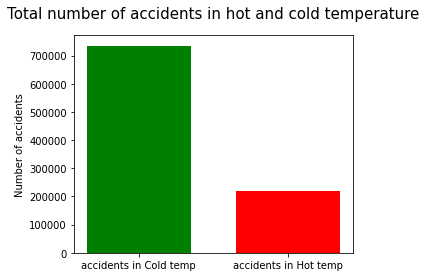

In [51]:
plt.figure(figsize=(5,4))
plt.bar('accidents in Cold temp',accident_cold_temp,color='green',width=0.7)
plt.bar('accidents in Hot temp',accident_hot_temp, color='red',width=0.7)
plt.ylabel("Number of accidents")
plt.title("Total number of accidents in hot and cold temperature",size=15, y=1.05)
plt.show()


## Missing values

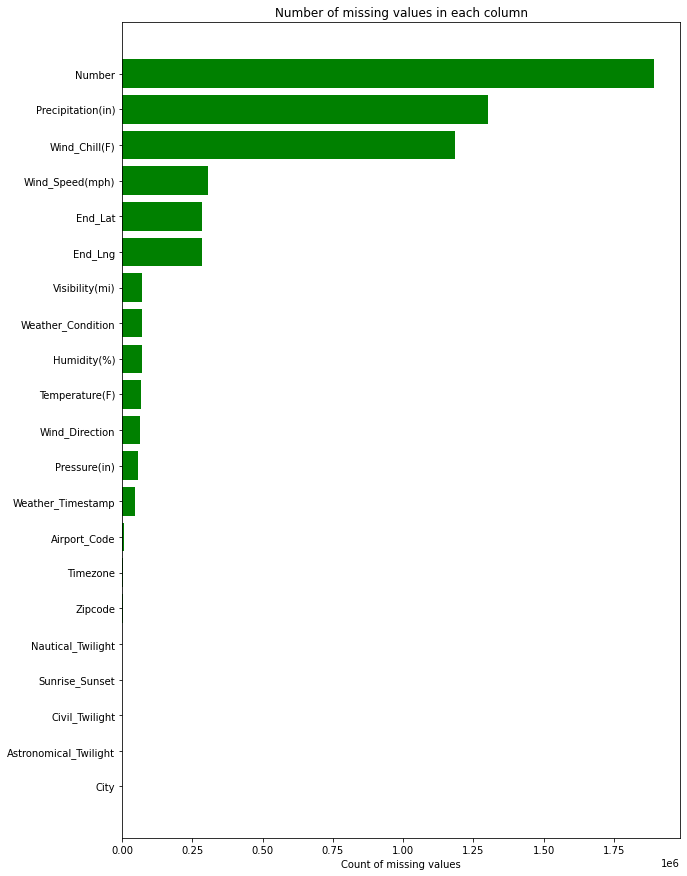

In [48]:
missing_df = df_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(10,15))
rects = ax.barh(ind,missing_df.missing_count.values,color='green')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

## EDA based on Time feature

In [121]:
# fix datetime type
df_data['Start_Time'] = pd.to_datetime(df_data['Start_Time'])
df_data['End_Time'] = pd.to_datetime(df_data['End_Time'])
df_data['Weather_Timestamp'] = pd.to_datetime(df_data['Weather_Timestamp'])

# calculate duration as the difference between end time and start time in minute
df_data['Duration'] = df_data.End_Time - df_data.Start_Time 
df_data['Duration'] = df_data['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df_data['Duration'].mean(),3)), 'min')

The overall mean duration is:  171.878 min


In [127]:
# df_data = df_data.drop(["Weather_Timestamp"], axis=1)

df_data['Year'] = df_data['Start_Time'].dt.year

nmonth = df_data['Start_Time'].dt.month
df_data['Month'] = nmonth

df_data['Weekday']= df_data['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df_data["Start_Time"].dt.day.values
df_data['Day'] = nday

df_data['Hour'] = df_data['Start_Time'].dt.hour

df_data['Minute']=df_data['Hour']*60.0+df_data["Start_Time"].dt.minute

df_data.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2019-05-21 08:29:55,2019,5,1,141,8,509.0
1,2019-10-07 17:43:09,2019,10,0,280,17,1063.0
2,2020-12-13 21:53:00,2020,12,6,347,21,1313.0
3,2018-04-17 16:51:23,2018,4,1,107,16,1011.0
4,2016-08-31 17:40:49,2016,8,2,243,17,1060.0


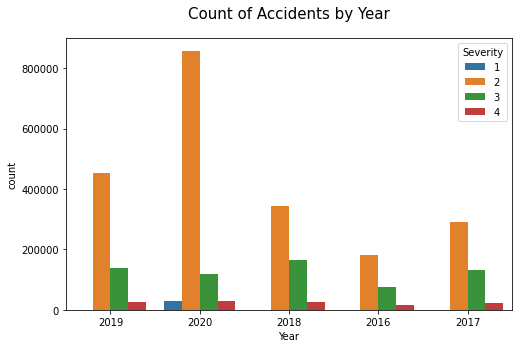

In [147]:
plt.figure(figsize=(8,5))
df_data.Year = df_data.Year.astype(str)
sns.countplot(x='Year', hue='Severity', data=df_data ,palette=sns.color_palette())
plt.title('Count of Accidents by Year', size=15, y=1.05)
plt.show()

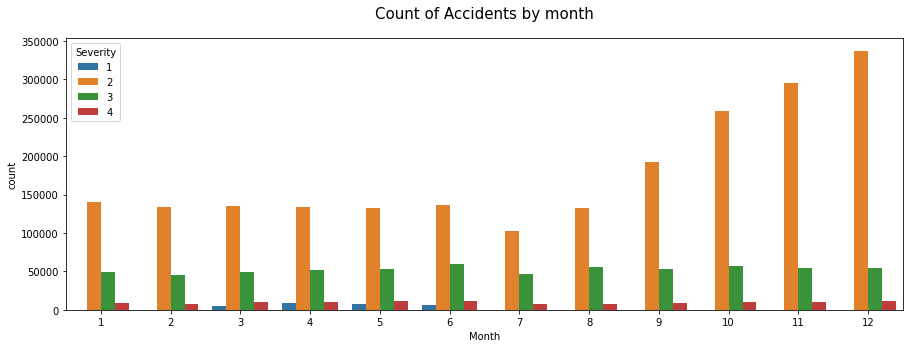

In [146]:
plt.figure(figsize=(15,5))
df_data.Year = df_data.Year.astype(str)
sns.countplot(x='Month', hue='Severity', data=df_data ,palette=sns.color_palette())
plt.title('Count of Accidents by month', size=15, y=1.05)
plt.show()

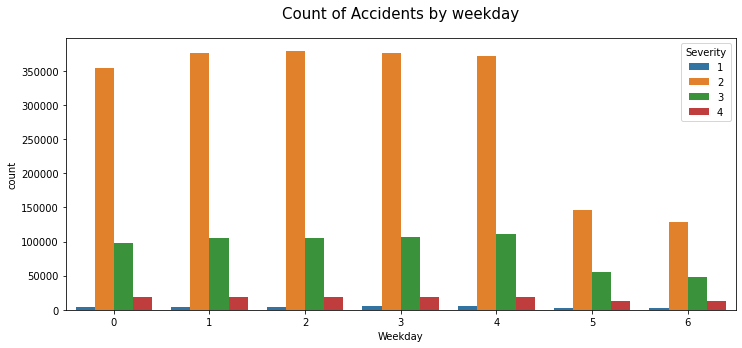

In [148]:
plt.figure(figsize=(12,5))
df_data.Year = df_data.Year.astype(str)
sns.countplot(x='Weekday', hue='Severity', data=df_data ,palette=sns.color_palette())
plt.title('Count of Accidents by weekday', size=15, y=1.05)
plt.show()

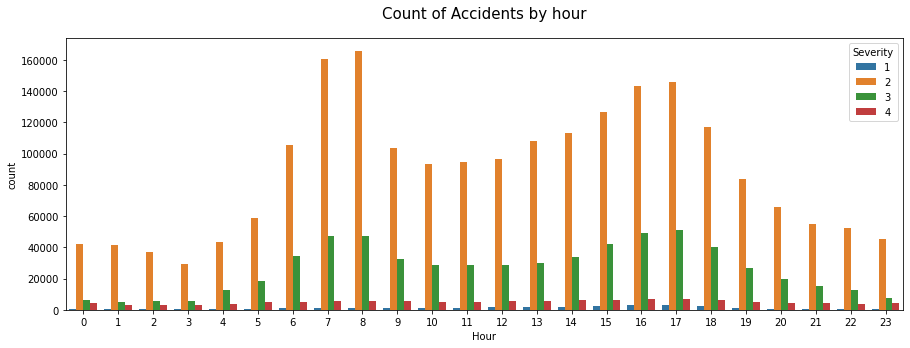

In [144]:
plt.figure(figsize=(15,5))
df_data.Year = df_data.Year.astype(str)
sns.countplot(x='Hour', hue='Severity', data=df_data ,palette=sns.color_palette())
plt.title('Count of Accidents by hour', size=15, y=1.05)
plt.show()

Period of the day

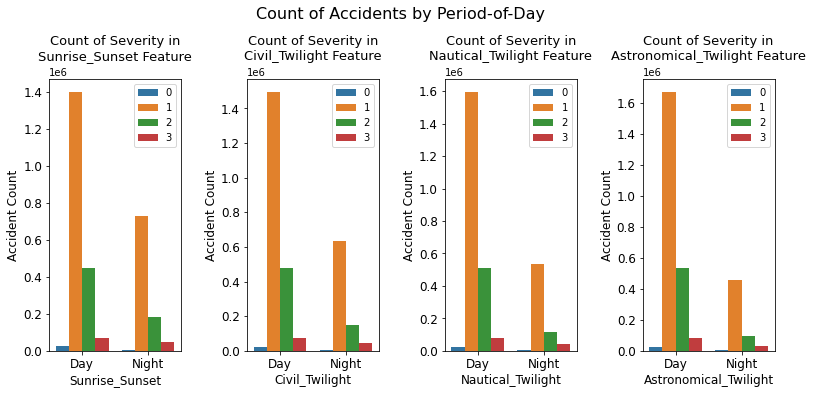

In [156]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity', data=df_data ,palette=sns.color_palette())
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1','2','3'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)

fig.suptitle('Count of Accidents by Period-of-Day',y=1.08, fontsize=16)
plt.show()

## Latitude and Longitude

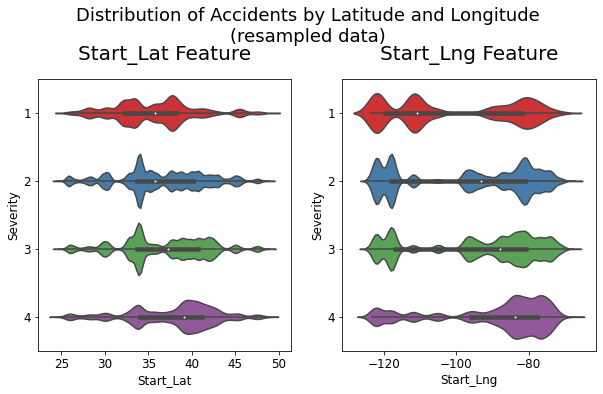

In [163]:
df_data['Severity'] = df_data['Severity'].astype('category')
num_features = ['Start_Lat', 'Start_Lng']
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(1, 2, i)
    sns.violinplot(x=feature, y="Severity", data=df_data, palette="Set1")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature'.format(feature), size=20, y=1.05)
fig.suptitle('Distribution of Accidents by Latitude and Longitude\n(resampled data)', fontsize=18,y=1.08)
plt.show()

# Map

Map based on severity level 1

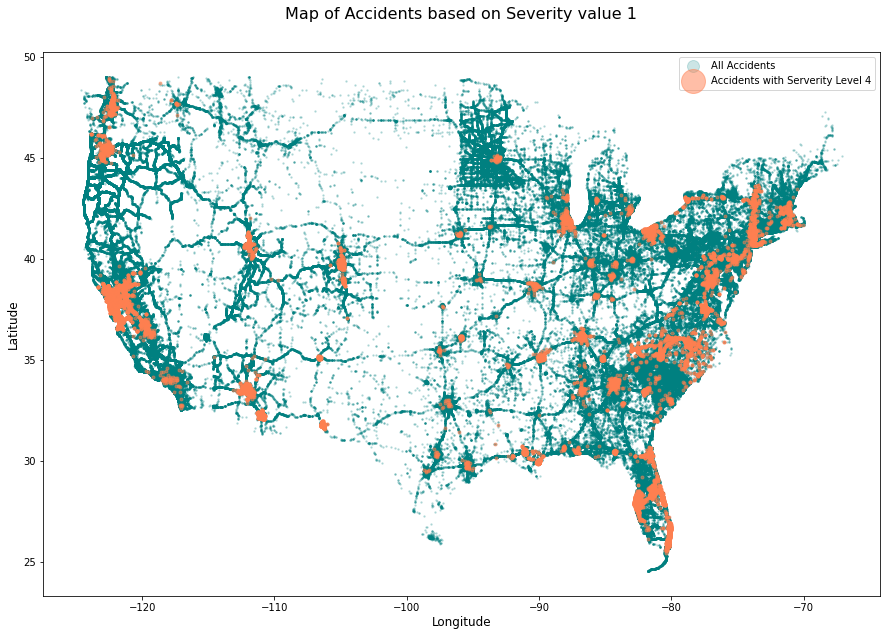

In [180]:
df_4 = df_data[df_data['Severity']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents based on Severity value 1', size=16, y=1.05)
plt.show()

Map based on severity level 4

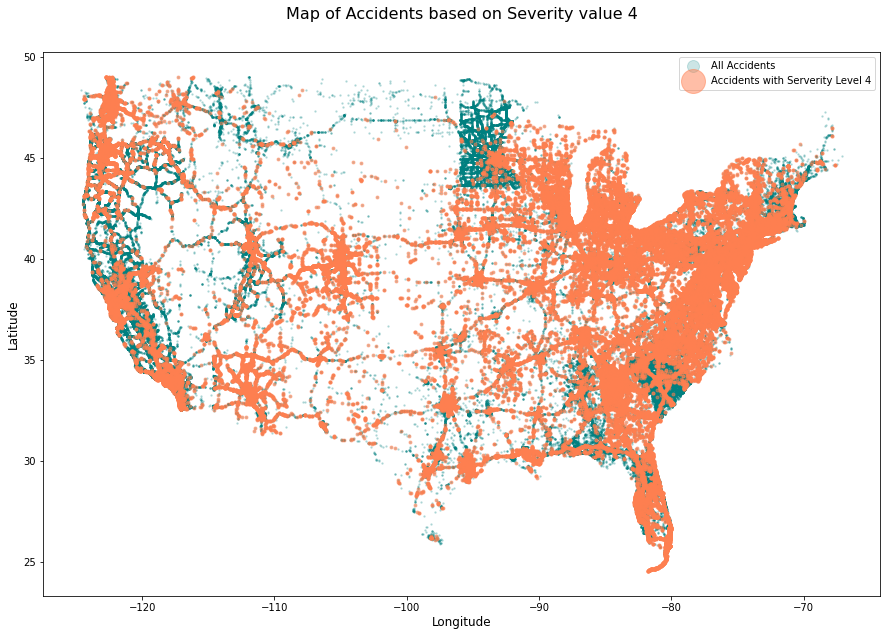

In [181]:
df_4 = df_data[df_data['Severity']==4]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents based on Severity value 4', size=16, y=1.05)
plt.show()

## data correlation

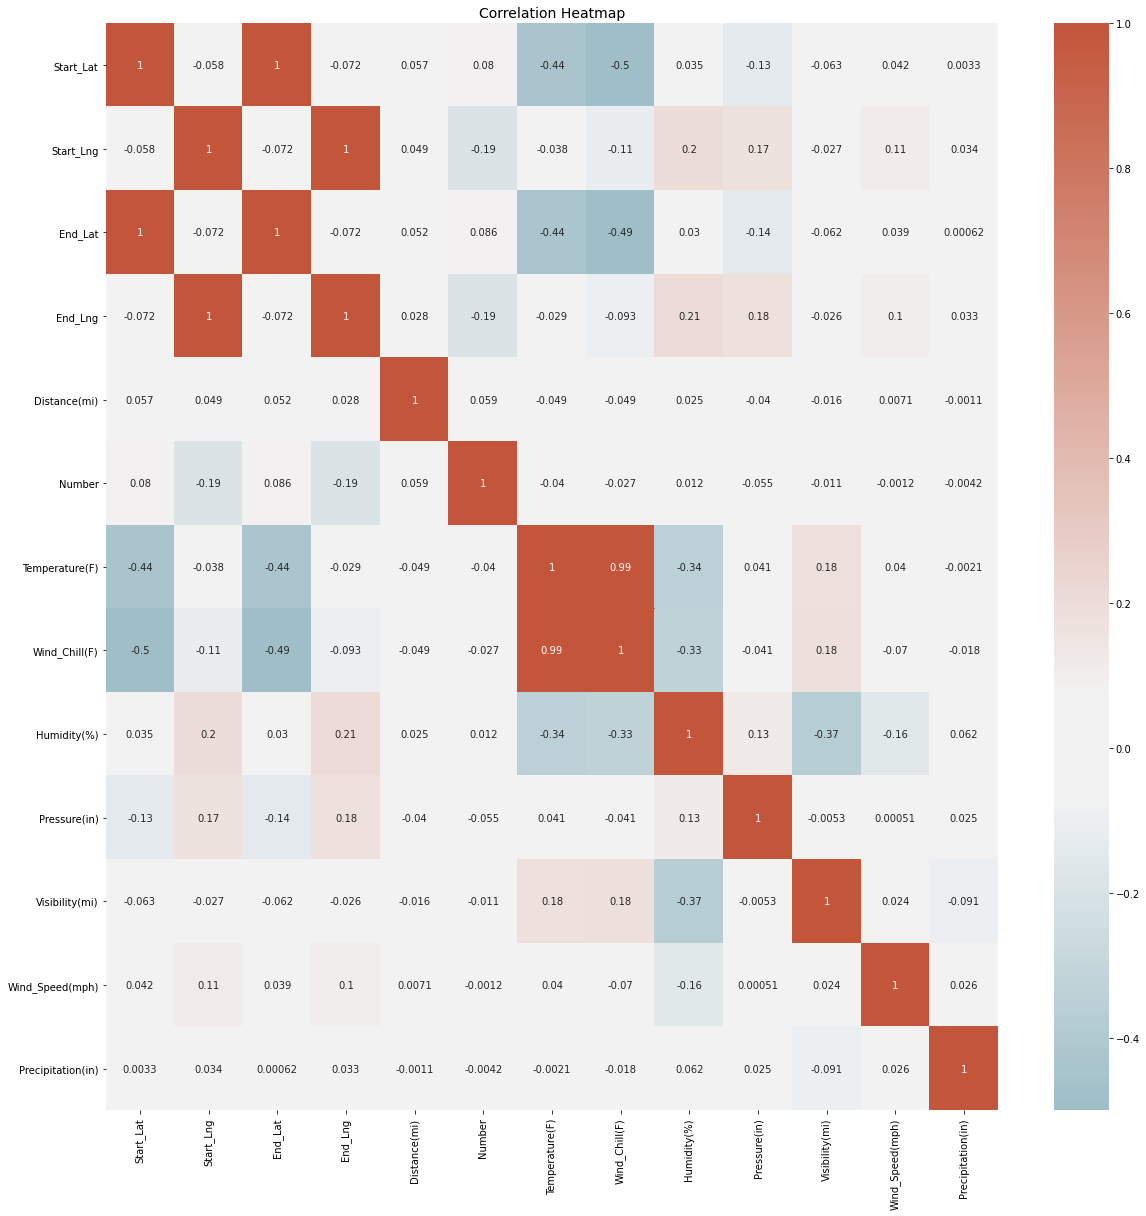

In [13]:
# plot correlation
x_cols = [col for col in df_data.columns if col not in ['Severity'] if df_data[col].dtype=='float64']
df_core=df_data[x_cols]
df_data['Severity4'] = df_data['Severity'].astype(int)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_core.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

#### Severity of the accident based on Amenity, wind chill, crossing, junction, traffic signal

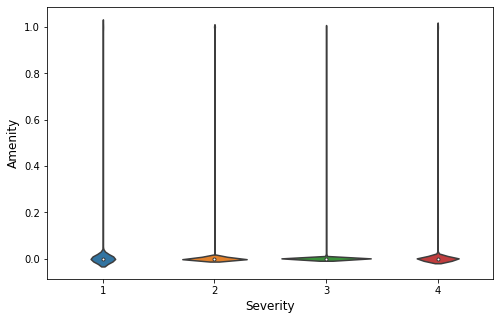

In [36]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Severity', y='Amenity', data=df_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Amenity', fontsize=12)
plt.show()

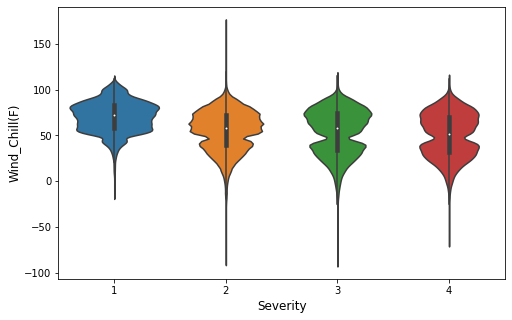

In [35]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Severity', y='Wind_Chill(F)', data=df_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Wind_Chill(F)', fontsize=12)
plt.show()

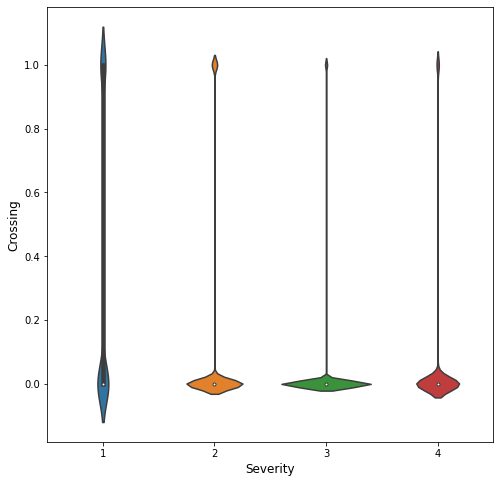

In [37]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Severity', y='Crossing', data=df_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Crossing', fontsize=12)
plt.show()

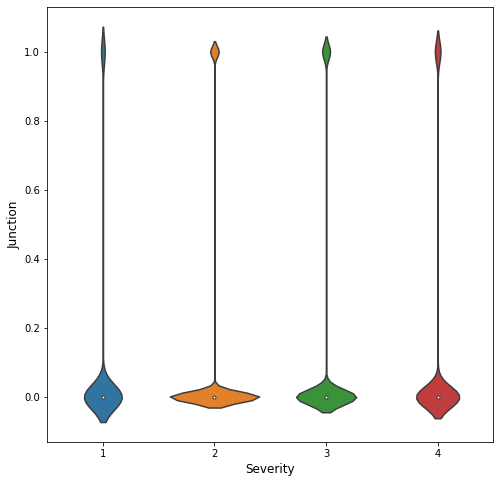

In [38]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Severity', y='Junction', data=df_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Junction', fontsize=12)
plt.show()

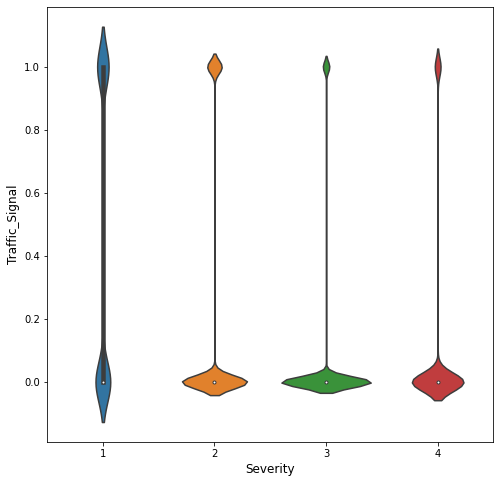

In [40]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Severity', y='Traffic_Signal', data=df_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Traffic_Signal', fontsize=12)
plt.show()

## Feature engineering 

In [8]:
train_y = df_data['Severity'].values
x_cols = [col for col in df_data.columns if col not in ['Severity'] if df_data[col].dtype=='float64']
train_col= df_data[x_cols]
train_col

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,34.808868,-82.269157,34.808868,-82.269157,0.000,439.0,76.0,76.0,52.0,28.91,10.0,7.0,0.0
1,35.090080,-80.745560,35.090080,-80.745560,0.000,3299.0,76.0,76.0,62.0,29.30,10.0,3.0,0.0
2,37.145730,-121.985052,37.165850,-121.988062,1.400,NaN,51.0,51.0,80.0,30.17,10.0,6.0,0.0
3,39.110390,-119.773781,39.110390,-119.773781,0.000,NaN,53.6,NaN,16.0,30.16,10.0,4.6,NaN
4,26.102942,-80.265091,26.102942,-80.265091,0.000,NaN,84.2,NaN,84.0,29.92,10.0,13.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,29.813824,-95.399437,29.813824,-95.399437,0.000,3001.0,84.2,NaN,70.0,30.02,9.0,5.8,NaN
2906606,34.068890,-117.342010,34.068890,-117.342010,0.000,NaN,46.9,NaN,74.0,30.14,10.0,NaN,NaN
2906607,25.702200,-80.335556,25.703040,-80.334099,0.108,8798.0,76.0,76.0,85.0,30.00,10.0,16.0,0.0
2906608,40.660140,-111.952460,40.660140,-111.952460,0.000,NaN,27.0,19.0,81.0,25.81,10.0,8.0,0.0


### Handle the missing value

In [9]:
for name_col in train_col.columns:
  print(name_col,':',train_col[name_col].isna().sum())

Start_Lat : 0
Start_Lng : 0
End_Lat : 282821
End_Lng : 282821
Distance(mi) : 0
Number : 1891672
Temperature(F) : 67224
Wind_Chill(F) : 1183859
Humidity(%) : 71270
Pressure(in) : 56908
Visibility(mi) : 72078
Wind_Speed(mph) : 307163
Precipitation(in) : 1301326


In [10]:
train_col.drop(['Wind_Chill(F)','Number'], axis=1, inplace=True)
df_train=train_col.fillna(train_col.mean())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Information Gain

In [88]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(df_train,train_y)

In [89]:
mutual_data=pd.Series(mutual_info,index=df_train.columns)
mutual_data.sort_values(ascending=False)

Start_Lng            0.277823
Start_Lat            0.263233
End_Lng              0.255817
End_Lat              0.243401
Visibility(mi)       0.202871
Distance(mi)         0.071025
Wind_Speed(mph)      0.036625
Temperature(F)       0.021407
Precipitation(in)    0.016515
Pressure(in)         0.014833
Humidity(%)          0.010830
dtype: float64